In [1]:
%matplotlib inline
import ncstudy.analysis as analysis
import numpy as np
import pdb
import time
import matplotlib.pyplot as plt
import matplotlib

# plt.style.use('dark_background')

# Full analysis run for viewing results only

In [2]:
A = analysis.Analysis('./nc_data')
A.run(fig_dir='./figures/manuscript',redo_MI=True);

  0%|          | 0/94 [00:00<?, ?it/s]

Loading...
Updating...


ncstudy/ephys.py:271: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return spikeTrace[1:-1][ap_thresh][0]
ncstudy/analysis.py:179: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  df.to_csv(celln.celldir+'/presyn_ids.csv', index=False)
  5%|▌         | 5/94 [00:51<15:19, 10.34s/it]ncstudy/cell.py:269: RuntimeWarning: Mean of empty slice
  synapse['delay'] = np.nanmean(synapse['delay'])
 24%|██▍       | 23/94 [03:41<11:16,  9.52s/it]/anaconda2/lib/python2.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/anaconda2/lib/python2.7/site-packa

Saving...


100%|██████████| 94/94 [06:24<00:00,  4.57s/it]


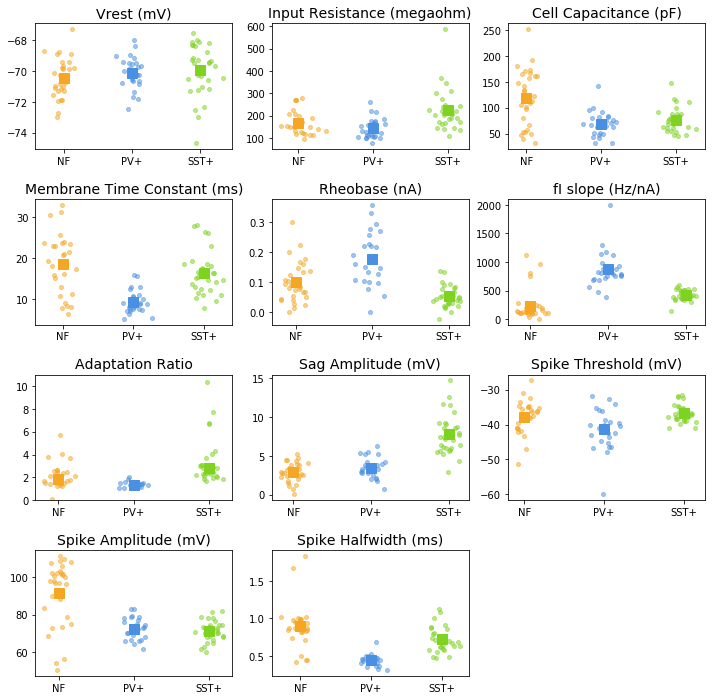

In [4]:
A.fig_ephys

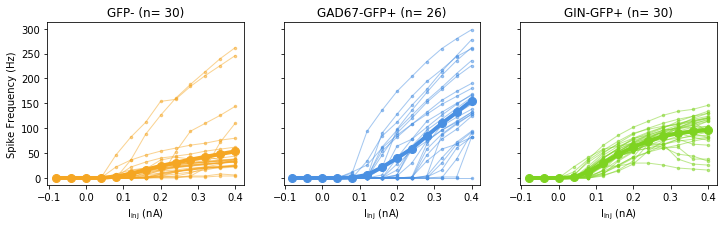

In [38]:
A.fig_fi

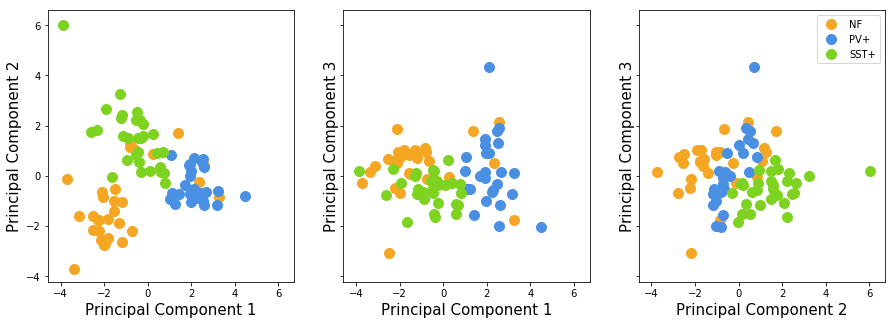

In [11]:
A.fig_pca

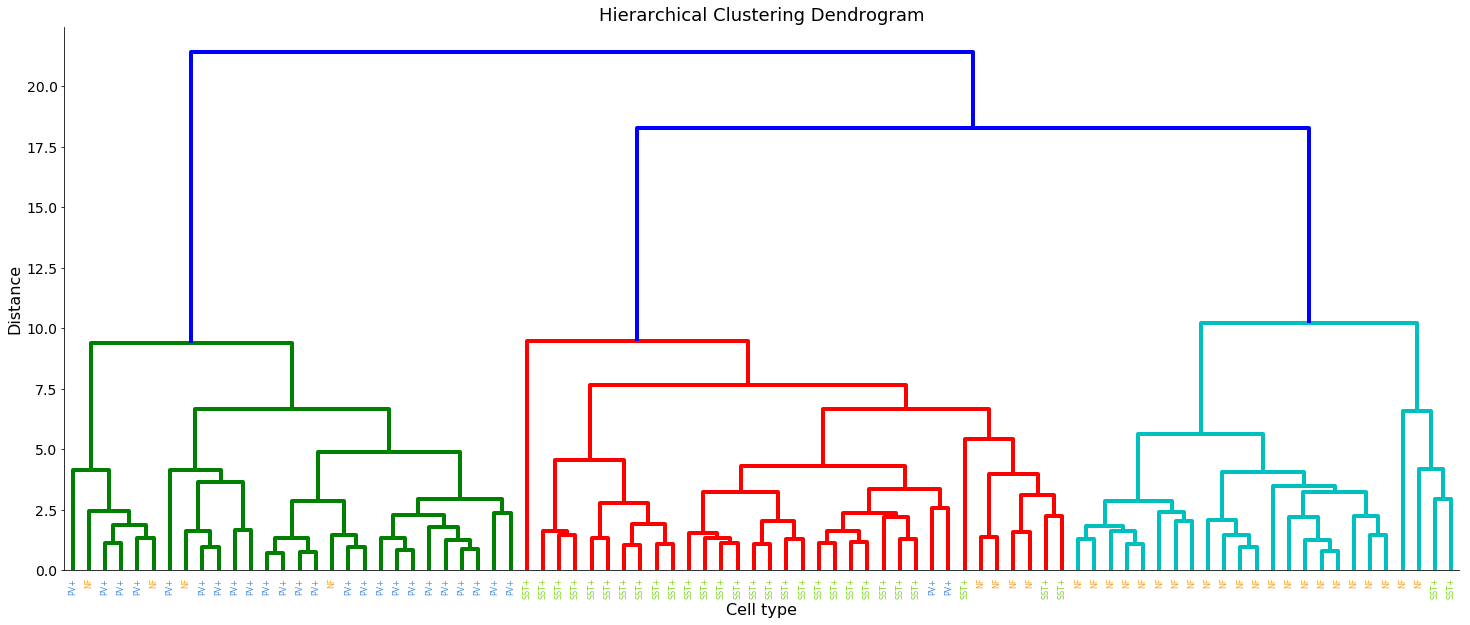

In [8]:
import matplotlib.pyplot as plt

ax = A.fig_dend.axes[0]
fluors = ['NF', 'PV+', 'SST+']
colors = ['#F5A623', '#4A90E2', '#7ED321']
for tl in ax.xaxis.get_ticklabels():
    color = [c for c,fl in zip(colors, fluors) if fl == tl.get_text()][0]
    tl.set_color(color)
    
ax.set_xlabel('Cell type', fontsize=16)
ax.set_ylabel('Distance', fontsize=16)
A.fig_dend

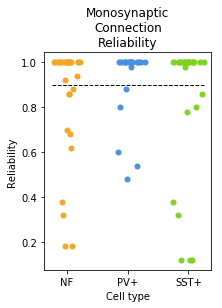

In [8]:
A.fig_monorel

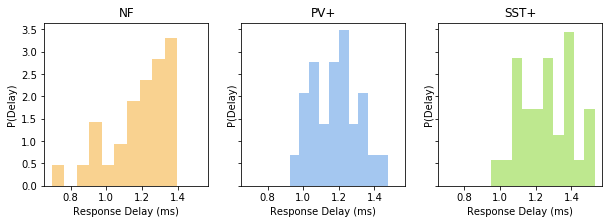

In [12]:
A.fig_mean_dly

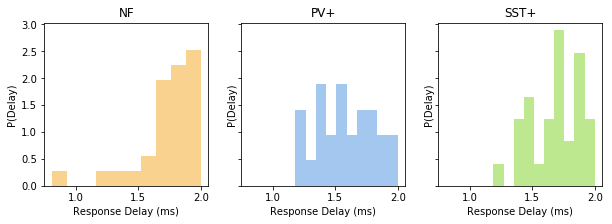

In [13]:
A.fig_max_dly

In [4]:
def popn_spikecount_histogram(cells, celltype='NF', codetype='rate',response='all'):

    popn_hi = []
    popn_low = []

    for cell_id, celln in A.cells.items():
        if celltype in celln.fluor:
            if celln.layer == 'L2/3' and celln.syns.reliability >= 0.9:

                try:
                    spkcount = getattr(celln, '%s_code'%codetype).spikeCounts[response]
                    signal = getattr(celln, '%s_code'%codetype).signal.astype('int')
                              
                    if response == 'all':
                        
                        spkcount_high = np.mean([counts[signal==1] for counts in spkcount])/0.05
                        spkcount_low = np.mean([counts[signal==0] for counts in spkcount])/0.05
                    
                    elif response == 'mono':
                        
                        spkcount_high = np.mean([counts[signal==1] for counts in spkcount])/0.00668
                        spkcount_low = np.mean([counts[signal==0] for counts in spkcount])/0.00668
                    
                    elif response == 'poly':
                        
                        spkcount_high = np.mean([counts[signal==1] for counts in spkcount])/(0.05-0.00668)
                        spkcount_low = np.mean([counts[signal==0] for counts in spkcount])/(0.05-0.00668)
                    
                        
                except AttributeError:
                        continue

                popn_hi.append(spkcount_high)
                popn_low.append(spkcount_low)

    if celltype == 'NF':
        
        color = '#F5A623'
        
    elif celltype == 'PV':
        
        color = '#4A90E2'
    
    elif celltype == 'SST':
        
        color = '#7ED321'
        
    if codetype == 'temp' :
        
        range = (0,55)
        
    elif codetype == 'rate':
        
        range = (0,140) 

    ee, bins, tt = plt.hist(popn_hi, bins='auto', range = range, color=color,density=True, alpha=0.7,label='High : %.3f pm %.3f'%(np.mean(popn_hi),np.std(popn_hi)))
    plt.hist(popn_low, bins=bins, color=color, alpha=0.3,density=True, label='Low : %.3f pm %.3f'%(np.mean(popn_low),np.std(popn_low)))    
    plt.legend()
    plt.savefig('./histograms/popn_spikecount_histogram_%s_%s_%s.svg'%(celltype,codetype,response))
    
    return popn_hi, popn_low

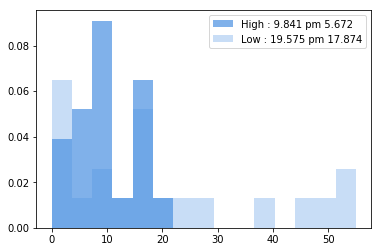

In [6]:
popn_hi, popn_low = popn_spikecount_histogram(A.cells,celltype='PV',codetype='temp',response='all')

In [7]:
def popn_voltage_histogram(cells, celltype='NF', codetype='rate',response='all'):

    popn_hi = []
    popn_low = []

    for cell_id, celln in A.cells.items():
        if celltype in celln.fluor:
            if celln.layer == 'L2/3' and celln.syns.reliability >= 0.9:

                try:
                    Vm_value = getattr(celln, '%s_code'%codetype).average_Vm[response]
                    signal = getattr(celln, '%s_code'%codetype).signal.astype('int')
                              
                    Vm_high = np.mean([counts[signal==1] for counts in Vm_value])
                    Vm_low = np.mean([counts[signal==0] for counts in Vm_value])

                except AttributeError:
                        continue

                popn_hi.append(Vm_high)
                popn_low.append(Vm_low)
                
    if celltype == 'NF':
        
        color = '#F5A623'
        
    elif celltype == 'PV':
        
        color = '#4A90E2'
    
    elif celltype == 'SST':
        
        color = '#7ED321'
        
    if codetype == 'temp' :
        
        range = (-75,-40)
        
    elif codetype == 'rate':
        
        range = (-80,-30) 

    ee, bins, tt = plt.hist(popn_hi, bins='auto', range = range, color=color,density=True, alpha=0.7,label='High : %.3f pm %.3f'%(np.mean(popn_hi),np.std(popn_hi)))
    plt.hist(popn_low,bins=bins,color=color,alpha=0.3,density=True, label='Low : %.3f pm %.3f'%(np.mean(popn_low),np.std(popn_low)))
    plt.legend()
    plt.savefig('./histograms/popn_Vm_histogram_%s_%s_%s.svg'%(celltype,codetype,response))

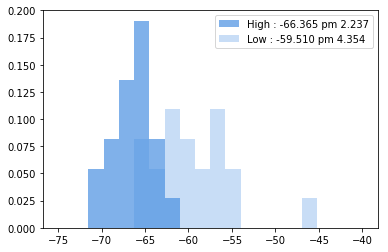

In [8]:
popn_voltage_histogram(A.cells,celltype='PV',codetype='temp',response='all')

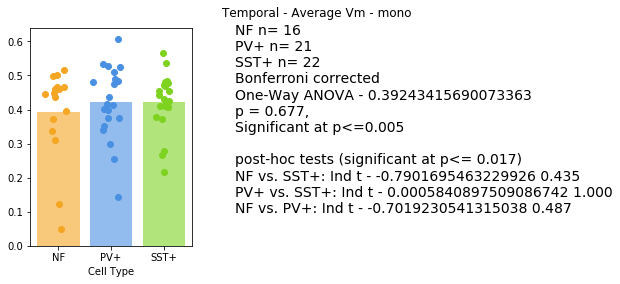

In [17]:
A.results['Temporal']['Average Vm']['mono']['fig']

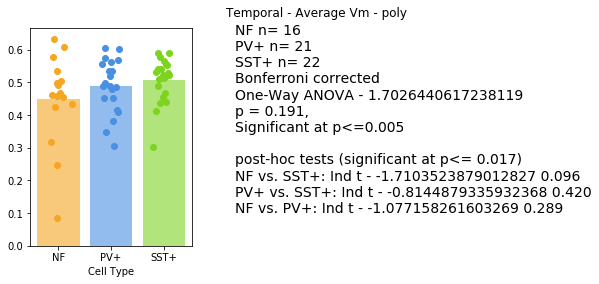

In [18]:
A.results['Temporal']['Average Vm']['poly']['fig']

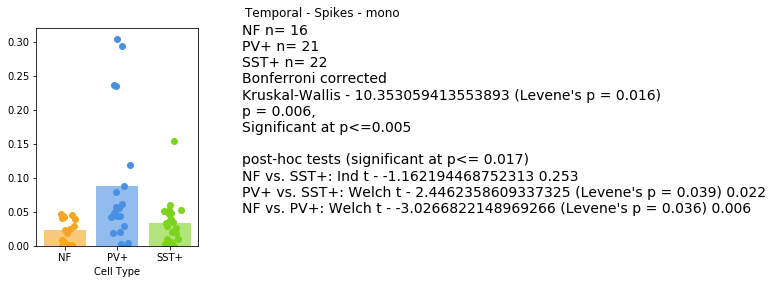

In [15]:
A.results['Temporal']['Spikes']['mono']['fig']

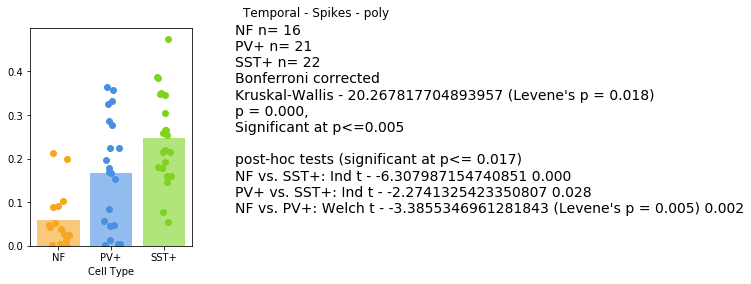

In [19]:
A.results['Temporal']['Spikes']['poly']['fig']

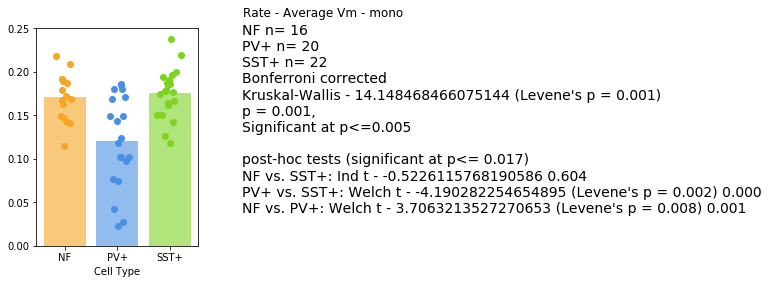

In [20]:
A.results['Rate']['Average Vm']['mono']['fig']

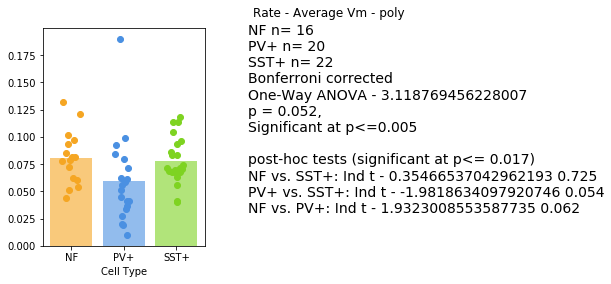

In [21]:
A.results['Rate']['Average Vm']['poly']['fig']

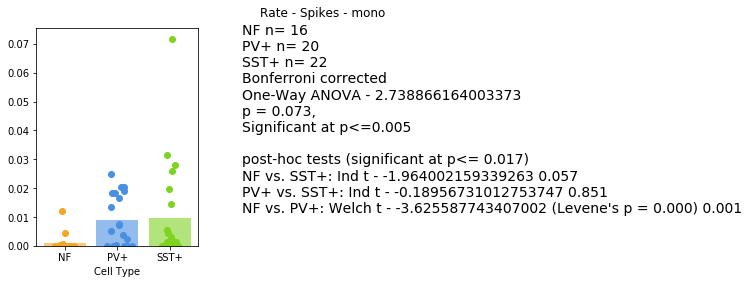

In [22]:
A.results['Rate']['Spikes']['mono']['fig']

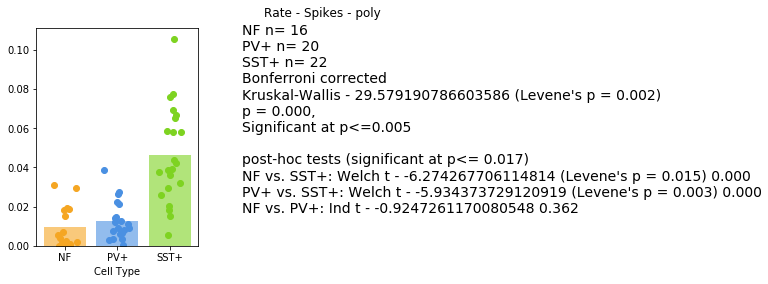

In [23]:
A.results['Rate']['Spikes']['poly']['fig']

## Electrophysiology analysis

In [24]:
import ncstudy.cell as cell
from ncstudy.utils import merge_dicts
import re
import pandas as pd
import ncstudy.plots as plots

In [17]:
data_path = './data'
cell_ids = [os.path.basename(dirname[0])
                 for dirname in os.walk(data_path)
                 if re.match(r'\d{2}\w{1}\d{2}\-\d{1}', os.path.basename(dirname[0]))]
cell_ids.sort()
cells = cell.CellCollection(data_path= data_path)

for cell_id in cell_ids:
    celldir = '%s/%s'%(data_path, cell_id)
    neuron = cell.Cell(celldir)
    results = neuron.extract_ephys(pulse_on = 266, pulse_len = 500, sampling_frequency = 10.,
                                   I_min = -0.08, I_max = 0.4, I_step = 0.04)
    cells.add(neuron)

/home/luke/anaconda2/envs/data/lib/python2.7/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/luke/anaconda2/envs/data/lib/python2.7/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


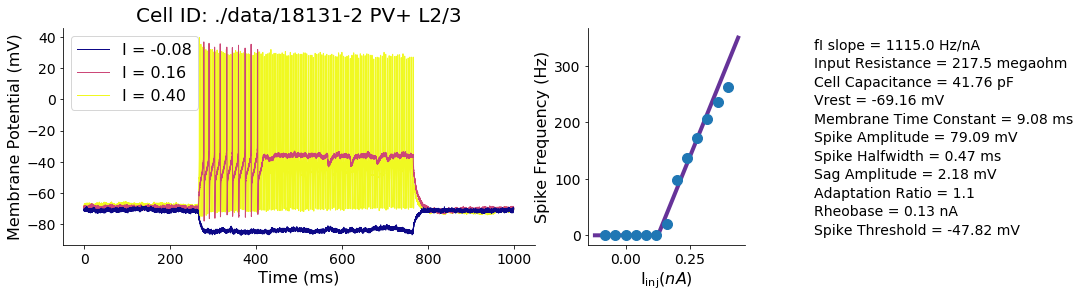

In [18]:
cells['18131-2'].ephys.plot()

## Table of electrophysiological properties and descriptive statistics

In [19]:
cells.collect_results()

In [22]:
df = pd.DataFrame(data=merge_dicts(cells.metadata,cells.ephys), index=cells.keys());

# Reorder columns

cols = ['Fluorescence','Layer',                                                # Cell Type
        'Vrest (mV)','Input Resistance (megaohm)',                             # Passive Properties
        'Cell Capacitance (pF)','Membrane Time Constant (ms)',                 # Passive Properties
        'Rheobase (nA)','fI slope (Hz/nA)',                                    # Active Properties
        'Adaptation Ratio','Sag Amplitude (mV)',                               # Slow Properties
        'Spike Threshold (mV)','Spike Amplitude (mV)','Spike Halfwidth (ms)']  # Action Potential Properties

df = df[cols]
cells.df_ephys = df[df['Layer']=='L2/3']
cells.df_ephys.groupby('Fluorescence').mean().round(2)

,Vrest (mV),Input Resistance (megaohm),Cell Capacitance (pF),Membrane Time Constant (ms),Rheobase (nA),fI slope (Hz/nA),Adaptation Ratio,Sag Amplitude (mV),Spike Threshold (mV),Spike Amplitude (mV),Spike Halfwidth (ms)
Fluorescence,,,,,,,,,,,
NF,-70.40,168.90,119.32,18.53,0.10,243.63,2.09,2.87,-37.77,90.99,0.90
PV+,-70.15,145.37,67.44,9.25,0.19,918.79,1.41,3.39,-40.56,72.13,0.43
SST+,-69.95,225.95,76.58,16.41,0.05,431.38,5.67,7.76,-36.79,71.29,0.72


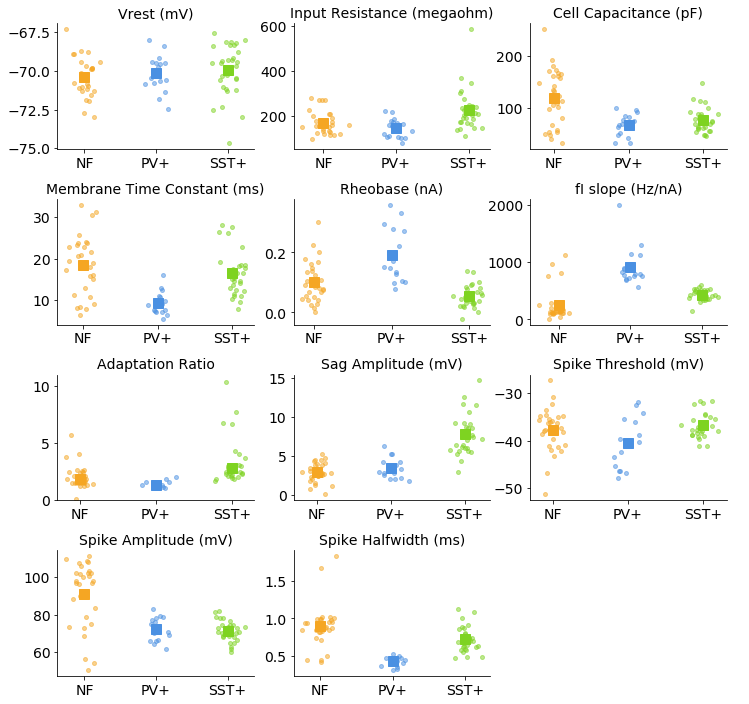

In [25]:
fig = plots.plot_ephys_summary(cells.df_ephys)
# fig.savefig('./figures/manuscript/ephys_features.svg')

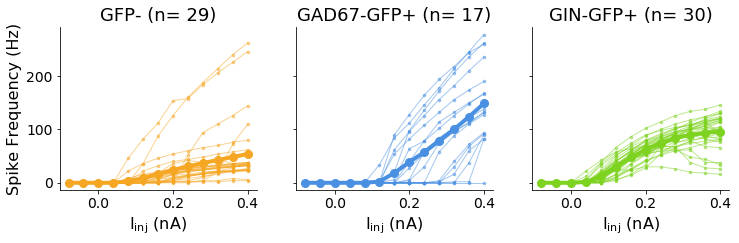

In [26]:
fig = plots.plot_fICurves(cells)

## Optogenetic Presynaptic Stimulation 

In [27]:
import ncstudy.cell as cell
import ncstudy.synapses as syns

In [30]:
for cell_id, celln in cells.items():
    celln.syns = cell.Synapses(celln.celldir, mono_winsize=5, total_winsize=200, sampling_frequency=10)
    celln.syns.extract_features()

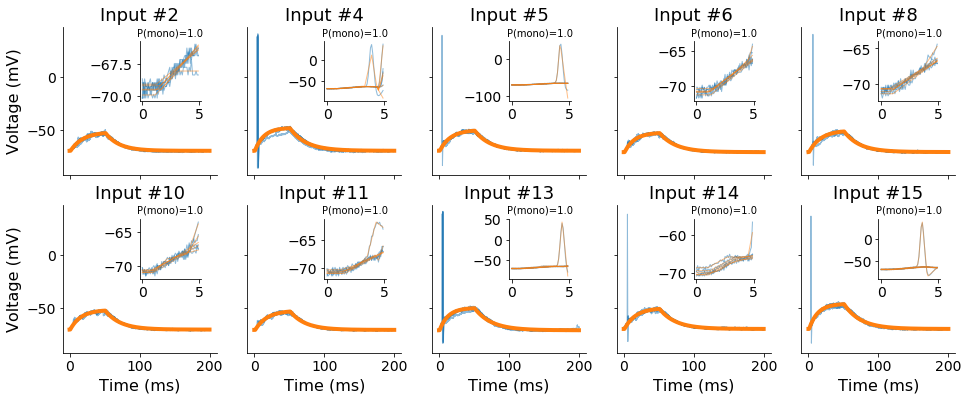

In [126]:
cells['18202-3'].syns.plot(savefig=False, figsize=(16,6))

In [128]:
cells.collect_results()
df = pd.DataFrame(data=merge_dicts(cells.metadata, cells.syns), index=cells.keys())
df_syns     = df[df['Layer']=='L2/3']

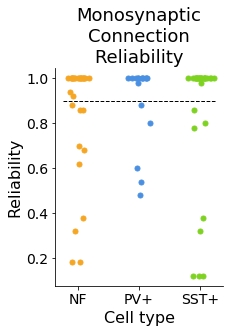

In [129]:
fig = plots.plot_syn_reliability(df_syns)

## Power Spectrum

In [10]:
from scipy import signal as sig, stats
from ABF_IO_v2 import load_episodic
import os

sampling_frequency = 10000

celldirs = [x for x in os.listdir('./nc_data') if x.startswith('1')]
celldirs.sort()

ff_rsq = []
rc_rsq = []
tc_rsq = []

ff_logp = []
rc_logp = []
tc_logp = []

ff_count = 0
r_count = 0
t_count = 0

for celldir in celldirs:
    try:
        data_ff = load_episodic('./data/%s/Full_field.abf'%celldir)
        ff_count += 1
        data_rc = load_episodic('./data/%s/Rate.abf'%celldir)
        r_count += 1
        data_tc = load_episodic('./data/%s/Temporal.abf'%celldir)
        t_count += 1
    except IOError:
        continue

    Vm_ff = data_ff[0][6*sampling_frequency:-6*sampling_frequency,:,0]
    Vm_rc = data_rc[0][6*sampling_frequency:-6*sampling_frequency,:,0]
    Vm_tc = data_tc[0][6*sampling_frequency:-6*sampling_frequency,:,0]

    for Vm,rsq, all_logp in zip([Vm_ff, Vm_rc, Vm_tc],[ff_rsq, rc_rsq, tc_rsq], [ff_logp, rc_logp, tc_logp]):
        f,p = sig.periodogram(Vm.T,fs=sampling_frequency)
        p = p.mean(axis=0)
        logf = np.log10(f[f<200][1:])
        logp = np.log10(p[f<200][1:])
        all_logp.append(logp)
        slope, intercept, rval, pval, stderr = stats.linregress(logf, logp)
        rsq.append(rval**2)
        
Rsq = np.array([ff_rsq, rc_rsq, tc_rsq])

ff_logp = np.mean(ff_logp, axis=0)
rc_logp = np.mean(rc_logp, axis=0)
tc_logp = np.mean(tc_logp, axis=0)

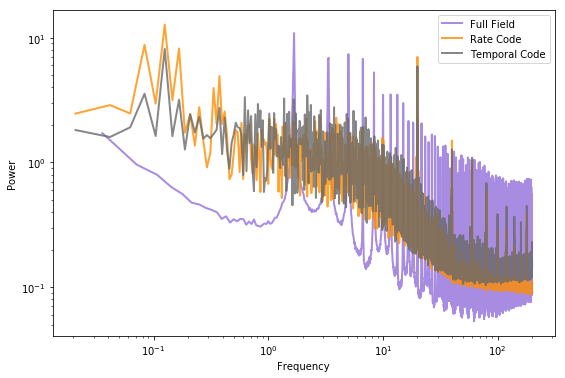

In [12]:
colors = ['mediumpurple', 'darkorange', 'dimgrey']

fig = plt.figure(figsize=(9,6))

ff_f = np.linspace(0,200,len(ff_logp)+1)[1:]
rc_f = np.linspace(0,200,len(rc_logp)+1)[1:]
tc_f = np.linspace(0,200,len(rc_logp)+1)[1:]

plt.loglog(ff_f, np.exp(ff_logp), colors[0], alpha=0.8, lw=2)
plt.loglog(rc_f, np.exp(rc_logp), colors[1], alpha=0.8, lw=2)
plt.loglog(tc_f, np.exp(tc_logp), colors[2], alpha=0.8, lw=2)

plt.legend(['Full Field', 'Rate Code', 'Temporal Code'])
plt.xlabel('Frequency')
plt.ylabel('Power')

fig.savefig('./figures/FENS_poster/power_spectrum_opto')

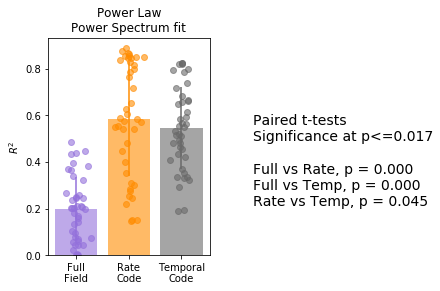

In [14]:
from itertools import combinations

colors = ['mediumpurple', 'darkorange', 'dimgrey']

fig = plt.figure(figsize=(6,4))
plt.bar(range(3), Rsq.mean(axis=1), yerr=Rsq.std(axis=1, ddof=1), color=colors, alpha=0.6, ecolor=colors)
for ix,group in enumerate(Rsq):
    plt.plot(np.random.randn(len(group))*0.1+ix, group, 'o',alpha=0.6,zorder=-2, color= colors[ix])

pair_combos = list(combinations(range(3),2))
results_string = 'Paired t-tests\nSignificance at p<=%.3f\n\n'%(0.05/len(pair_combos))
dataTypes = ['Full\nField', 'Rate\nCode', 'Temporal\nCode']

for pair in pair_combos:
    ix1,ix2 = pair
    _,p_test = stats.ttest_rel(Rsq[ix1],Rsq[ix2])
    results_string += '%s vs %s, p = %.3f\n'%(dataTypes[ix1][:4], dataTypes[ix2][:4], p_test)
    
plt.xticks(range(3),dataTypes)
plt.ylabel('$R^2$')
plt.title('Power Law\nPower Spectrum fit')

fig.subplots_adjust(right=0.5)
ax_results = fig.add_axes([0.6,0.125,0.375,0.775])
plt.sca(ax_results)
plt.text(x=0.0, y=0.15, s=results_string, fontsize=14)
plt.axis('off')

fig.savefig('./figures/svg/power_spectrum_rsq')